In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Ananlysis

In [3]:
missing_val = pd.DataFrame(data = df.isnull().sum() , index = df.columns.values , columns = ['No. of missing Values'])
missing_val["Percentage"] = [round(i*100/(df.shape[0]) , 2) for i in missing_val['No. of missing Values']]
missing_val

,No. of missing Values,Percentage
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


#### Above we can see there are 3 features for which we have missing values. 
- In "Age" 20% of entries are missing
- In "Cabin" 77% of entries are missing
- In "Embarked" only 2 entries are missing

### Survived:

In [4]:
print("Total Survivals in the Accident:" , df['Survived'].sum())

Total Survivals in the Accident: 342


<AxesSubplot:xlabel='Survived', ylabel='count'>

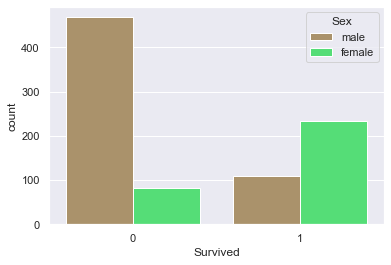

In [5]:
## Creating countplot for "Survived" feature with respect to "Sex"....
sns.set(style="darkgrid")
sns.countplot(x = 'Survived' , hue = 'Sex' , data = df , palette = 'terrain_r' , saturation = 1  )

##### Our Takeaways:
- There are more males which died compared to womens; approx 450+
- There are more womens which survived the accident; approx 210+
##### In the above Plot we can examine the survivals.

### Passenger Class:

In [6]:
## Creating DF for "Passenger Class" and "Survived" feature analysis....
class_sex_sur = pd.DataFrame(data = df['Pclass'].unique() , columns = ['Passenger Class'])

psg_survived = []
psg_died = []
for i in df['Pclass'].unique():
    temp = pd.DataFrame()
    temp = df[df['Pclass'] == i]
    psg_survived.append(temp['Survived'].sum()) 
    psg_died.append(temp.shape[0] - temp['Survived'].sum())
    
    
class_sex_sur['Survived'] = psg_survived
class_sex_sur['Died'] = psg_died

class_sex_sur.sort_values(by = ['Passenger Class'] , ascending=True)

,Passenger Class,Survived,Died
1,1,136,80
2,2,87,97
0,3,119,372


<AxesSubplot:xlabel='Pclass', ylabel='count'>

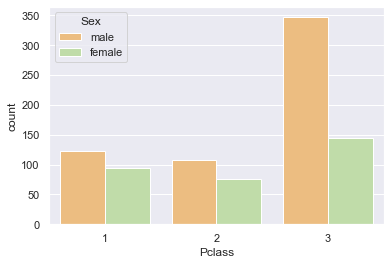

In [7]:
## Creating countplot for "Pclass" feature with respect to "Sex".... 
sns.countplot(x = 'Pclass' , hue = "Sex", data = df , palette = 'Spectral')

<AxesSubplot:xlabel='Survived', ylabel='count'>

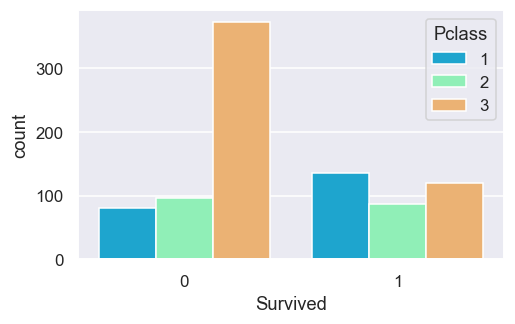

In [8]:
plt.figure(dpi = 110 , figsize = (5,3))
sns.countplot(x = 'Survived' , hue = 'Pclass' , data = df , palette = 'rainbow')

#### Our Takeaways:
- Majority of people are from 3rd Class
- In all the class "Mens" are in majority
- Majority of people from 1st Class survived the accident
- More than 75% of people from 3rd Class died in the accident, out of which majority are Mens

- Here, around 600+ passengers do not ahve any Sibling/Spouse
- Around 200+ passengers have 1 Sibling/Spouse

### Siblings and Spouse:

<AxesSubplot:xlabel='SibSp', ylabel='count'>

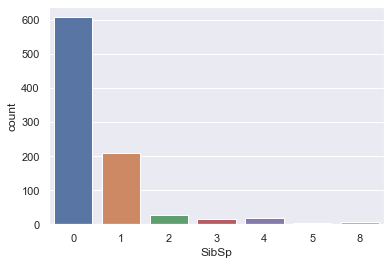

In [9]:
## Creating countplot for "SibSP" feature.... 
sns.countplot(x = 'SibSp' , data = df)

- Since, large number of people died have missing cabin value
- Also, many people who survived they do have valid entries
#### Considering it a significant trait, we can make a new feature about "Null Cabin Entries"

### -------------------------------------------------------------------------------------------------------------------------------------------------

## Feature Engineering :


#### Sex:

In [10]:
df['Sex'] = pd.get_dummies(df['Sex'] , drop_first = True)

## Mapping categorical "Sex" feature for easy in computation...
## Here Females are mapped to "0" and Males are mapped to "1"....

#### Cabin:

In [11]:
df['Cabin_null'] = np.where(df['Cabin'].isnull() , 0 , 1)

## Creating an extra feature by Mapping "Filled" records with "1"and "Nan" records with "0".....

In [12]:
## Creating some analysis......
for i in df['Pclass'].unique():
    print(round(df[df['Pclass'] == i].Cabin_null.mean()*100 , 2) ,"% of people's Cabin Entry from Class:", i, "were Missing.")

2.44 % of people's Cabin Entry from Class: 3 were Missing.
81.48 % of people's Cabin Entry from Class: 1 were Missing.
8.7 % of people's Cabin Entry from Class: 2 were Missing.


In [13]:
for i in np.sort(df['Pclass'].unique()):
    print(df[df['Pclass'] == i].Sex.sum() ,": Males" , " and " , 
          df[df['Pclass'] == i].shape[0] - df[df['Pclass'] == i].Sex.sum() ,": Womans", 
          "- from Class :" , i)

122 : Males  and  94 : Womans - from Class : 1
108 : Males  and  76 : Womans - from Class : 2
347 : Males  and  144 : Womans - from Class : 3


In [14]:
for i in np.sort(df['Pclass'].unique()):
    for j in df['Survived'].unique():
        m = df[df['Pclass'] == i]
        if j == 1:
            m = m[m['Survived'] == j]
            print(m.Sex.sum() , ": Male Survived ;" , m.shape[0] - m.Sex.sum() , ": Woman Survived from Class", i)
        else:
            m = m[m['Survived'] == j]
            print(m.Sex.sum() , ": Male Died ;" , m.shape[0] - m.Sex.sum() , ": Woman Died from Class", i)

77 : Male Died ; 3 : Woman Died from Class 1
45 : Male Survived ; 91 : Woman Survived from Class 1
91 : Male Died ; 6 : Woman Died from Class 2
17 : Male Survived ; 70 : Woman Survived from Class 2
300 : Male Died ; 72 : Woman Died from Class 3
47 : Male Survived ; 72 : Woman Survived from Class 3


### Dealing with missing values in "Age":

In [15]:
#### Applying the technique of Random Sample Imputation
## Here we have created an Function to Impute Random Sample values in place of NAN Values.... 

def random_sample_imputation(df , variable):
    df[variable+"_random_sample"] = df[variable]
    ## Creating an array of random samples from "Age" column....
    ## Length of an array should be same as the Number of NAN values...
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum() , random_state = 0)
    random_sample.index = df[df[variable].isnull()].index
    ## Now replacing the NAN values with the random sample values....
    df.loc[df[variable].isnull() , variable+'_random_sample'] = random_sample
    

random_sample_imputation(df , 'Age')

#### Applying the technique of Mean / Median Imputation

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

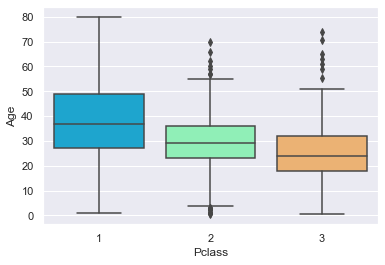

In [16]:
## Boxplot for "Age" and "Pclass".....
sns.boxplot(y = "Age" , x = "Pclass" , data = df , palette = "rainbow")

- 50 percentile of people from Class 1 are under the Age of : 37 Yrs
- 50 percentile of people from Class 2 are under the Age of : 29 Yrs
- 50 percentile of people from Class 3 are under the Age of : 23 Yrs

In [17]:
## Filling up NAN of "Age" Feature....
temp_age = []

for i in df[['Age','Pclass']].values.tolist():
    if pd.isnull(i[0]):
        if i[1] == 3:
            temp_age.append(37)
        elif i[1] == 2:
            temp_age.append(29)
        else:
            temp_age.append(23)
    else:
        temp_age.append(i[0])

df['Age_NAN_filled'] = temp_age

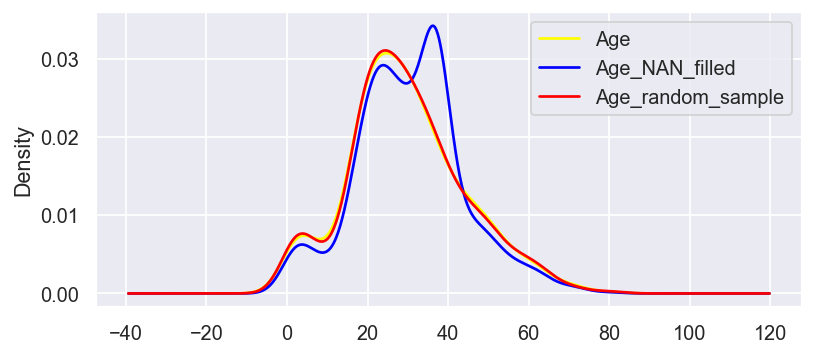

In [18]:
## Comparing to find the profitable imputation technique....
fig = plt.figure(dpi = 130 , figsize = (7,3))
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde' , ax = ax , color = 'yellow')
df['Age_NAN_filled'].plot(kind = 'kde' , ax = ax , color = 'blue')
df['Age_random_sample'].plot(kind = 'kde' , ax = ax , color = 'red')
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines , labels, loc = 1)

##### Here we have applied 2 different Feature Enginnering Techniques:
1. We simply applied type of Mean/Median Imputation technique by the help of trends obtained from Boxplot
2. We applied Random Sample Imputation technique, by replacing NAN with random values from Age Feature


In [19]:
print("Variance in Age feature obtained from Random Sample Imputation technique is :" , df.Age_random_sample.std())
print("Variance in Age feature obtained from type of Mean/Median Imputation technique is :" , df.Age_NAN_filled.std())
print("Variance of Age feature with NAN values is :" , df.Age.std())

Variance in Age feature obtained from Random Sample Imputation technique is : 14.5636540895687
Variance in Age feature obtained from type of Mean/Median Imputation technique is : 13.339442624441377
Variance of Age feature with NAN values is : 14.526497332334044


#### Since we got similar variance on the application of Random Sample Imputation Technique, So we will "Age_random_sample" as our new feature. 

In [20]:
## dropping all the unwanted features from the DataFrame...
new_df = df.drop(['Cabin', 'Name', 'Ticket','PassengerId' , 'Parch', 'Age' ,'Age_NAN_filled'], axis=1)

In [21]:
## Here we are dropping the unanswered entries of "Embarked" Feature -> There are only 2, NULL entries...
new_df['Embarked'] = new_df['Embarked'].fillna('S')

In [22]:
## Finding the count of unique values in "Embarked" feature...
new_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
## Here, we have used "get.dummies" method to create dummies for "Embarked" feature...
new_df = new_df.join(pd.get_dummies(new_df['Embarked'], drop_first = True))

## Joining the created dataframe to main DataFrame...
cleaned_df = new_df.drop(['Embarked'] , axis = 1)

## Dropping "Embarked" feature from the main DataFrame...
cleaned_df.head()

,Survived,Pclass,Sex,SibSp,Fare,Cabin_null,Age_random_sample,Q,S
0,0,3,1,1,7.2500,0,22.0,0,1
1,1,1,0,1,71.2833,1,38.0,0,0
2,1,3,0,0,7.9250,0,26.0,0,1
3,1,1,0,1,53.1000,1,35.0,0,1
4,0,3,1,0,8.0500,0,35.0,0,1


## Making of ML Model


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = cleaned_df.iloc[:,1:]
y = cleaned_df.iloc[:,0:1]

scaler.fit(x)
x = scaler.transform(x)

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split(x , y, test_size=0.20)

#### Logistic Regression:

In [26]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(random_state = 55)
reg.fit(x_train , y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=55)

In [27]:
y_train_pred = reg.predict(x_train)

from sklearn import metrics
metrics.confusion_matrix(y_train_pred , y_train)

array([[389,  84],
       [ 60, 179]], dtype=int64)

In [28]:
print('Train Accuracy :' , round(metrics.accuracy_score(y_train_pred , y_train)*100 , 2), "%")

Train Accuracy : 79.78 %


In [29]:
print( "Test Accuracy :" , round(metrics.accuracy_score(reg.predict(x_test) , y_test)*100 , 2), "%")

Test Accuracy : 83.24 %


#### Random Forest Classifier:

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(random_state = 50)
RF_clf.fit(x_train , y_train)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(random_state=50)

In [31]:
print( "Test Accuracy :" , round(metrics.accuracy_score(RF_clf.predict(x_test) , y_test)*100 , 2), "%")

Test Accuracy : 80.45 %


#### Gradient Boosting Classifier:

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

GB_clf = GradientBoostingClassifier(random_state = 50)
GB_clf.fit(x_train , y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier(random_state=50)

In [33]:
print( "Test Accuracy :" , round(metrics.accuracy_score(GB_clf.predict(x_test) , y_test)*100 , 2), "%")

Test Accuracy : 81.56 %


### ------------------------------------------------------------------------------------------------------------------------------------------------------